# <span style='color:White'>Multiple linear Regression : Least Squares Method</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x1 = np.array([1,2,3])
x2 = np.array([3,4,7])
y = np.array([2,5,9])

In [3]:
x = np.column_stack((np.ones(len(x1)),x1,x2))
x

array([[1., 1., 3.],
       [1., 2., 4.],
       [1., 3., 7.]])

In [4]:
p = np.dot(x.T,x)
p_inv = np.linalg.inv(p)
q = np.dot(x.T, y)
b = np.dot(p_inv, q)
b

array([-2. ,  2.5,  0.5])

In [5]:
b0,b1,b2 = b
print(b0)
print(b1)
print(b2)

-2.0
2.5
0.5


In [6]:
# prediction
y_pred = x @ b
print("predicted y:",y_pred)
print("actual y:",y)

predicted y: [2. 5. 9.]
actual y: [2 5 9]


In [7]:
# PREDICTION ON NEW MATRIX
x1_new = np.array([2, 4, 5])
x2_new = np.array([4, 6, 8])
x = np.column_stack((np.ones(len(x1_new)),x1_new,x2_new))
y_new_pred = x @ b

y_new_pred

array([ 5. , 11. , 14.5])

In [8]:
# required libraroes
from mpl_toolkits.mplot3d import Axes3D

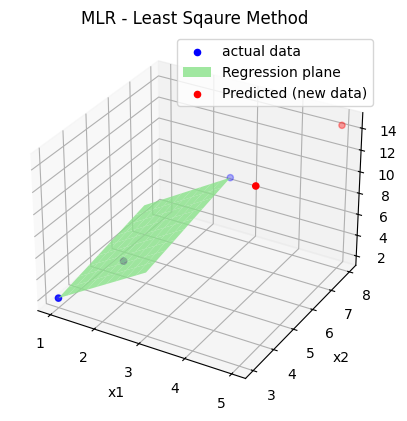

In [9]:
# Create a 3D Plotting Canvas
# plt.figure() creates a new figure window.
# add_subplot(111, projection='3d') creates a single 3D plot (1 row, 1 column, 1 plot).
# ax is the 3D axis object that you’ll use to draw everything.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')



# Plot Actual Data Points
# ax.scatter() is used for plotting 3D scatter points.
# x1, x2, y are the coordinates.
# color='red': Makes the dots red.
# label='Actual data': For the plot legend.
ax.scatter(x1,x2,y,color = 'blue', label = 'actual data')



# Create a Grid for the Regression Plane
# np.linspace(min(x1), max(x1), 10): Generates 10 values evenly spaced between the minimum and maximum of x1.
# np.meshgrid(...): Creates two 2D arrays (x1_grid and x2_grid) for all combinations of x1 and x2.
# These are used to evaluate the regression surface over a grid.
x1_grid, x2_grid = np.meshgrid(np.linspace(min(x1),max(x1),10), np.linspace(min(x2),max(x2),10))



# Compute Predicted y-values for the Grid
# This applies the regression equation to every point on the grid to create y values for the surface:
# y = b0 + b1x1 + b2x2
y_grid = b0 + b1*x1_grid + b2*x2_grid



# Plot the Regression Plane
# plot_surface() draws a 3D surface using the grid values.
# alpha=0.5: Makes the surface semi-transparent.
# color='blue': Blue color for the plane.
ax.plot_surface(x1_grid,x2_grid,y_grid,color = 'lightgreen',alpha = 0.8, label = 'Regression plane')

# plot of pridicted data
ax.scatter(x1_new,x2_new,y_new_pred,color = 'red', label='Predicted (new data)')

# Add Axis Labels and Title, legend, display
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title("MLR - Least Sqaure Method")
plt.legend()
plt.show()